In [1]:
import plot_functions as pf
import tensorflow as tf
import keras
import numpy as np

In [2]:
# plotDict2D = {
#     "1e3": r"D:\Programming_Projects\APRG\ai_collaboration\codes\ThermalCavity\Local_Plotting_Scripts\models\2023-12-10-22_05_35--Ra_1e3--nepochs_5e3\Checkpoints\5000_of_5000",
#     "1e4": r"D:\Programming_Projects\APRG\ai_collaboration\codes\ThermalCavity\Local_Plotting_Scripts\models\2023-12-10-22_05_44--Ra_1e4--nepochs_5e3\Checkpoints\5000_of_5000",
#     "1e5": r"D:\Programming_Projects\APRG\ai_collaboration\codes\ThermalCavity\Local_Plotting_Scripts\models\2023-12-10-22_05_51--Ra_1e5--nepochs_5e4\Checkpoints\50000_of_50000",
#     "1e6": r"D:\Programming_Projects\APRG\ai_collaboration\codes\ThermalCavity\Local_Plotting_Scripts\models\2023-12-10-22_05_55--Ra_1e6--nepochs_5e4\Checkpoints\50000_of_50000"
#      }
plotDict2D = {
    "1e3": r"D:\Programming_Projects\APRG\ThermalCavity\Local_Plotting_Scripts\models\2024-01-16-10_41_47--Ra_1e3--nepochs_4e4\Checkpoints\40000_of_40000",
    "1e4": r"D:\Programming_Projects\APRG\ThermalCavity\Local_Plotting_Scripts\models\2024-01-16-10_41_51--Ra_1e4--nepochs_4e4\Checkpoints\40000_of_40000",
    "1e5": r"D:\Programming_Projects\APRG\ThermalCavity\Local_Plotting_Scripts\models\2024-01-16-10_42_02--Ra_1e5--nepochs_2e5\Checkpoints\200000_of_200000",
    "1e6": r"D:\Programming_Projects\APRG\ThermalCavity\Local_Plotting_Scripts\models\2024-01-16-10_42_08--Ra_1e6--nepochs_2e5\Checkpoints\200000_of_200000"
     }
plotsWanted3D = {
    "1e3": 1e3,
    "1e4": 1e4,
    "1e5": 1e5,
    "1e6": 1e6
}
# plot3D = r"D:\Programming_Projects\APRG\ai_collaboration\codes\ThermalCavity\Local_Plotting_Scripts\models\2023-12-10-22_06_50--nepochs_3e4\Checkpoints\30000_of_30000"
plot3D = r"D:\Programming_Projects\APRG\ThermalCavity\Local_Plotting_Scripts\models\2024-01-16-01_28_50--nepochs_1e5\Checkpoints\100000_of_100000"

In [3]:
save_path = "./plots/"

In [4]:
nx = 150
x = np.linspace(0,1,endpoint=True,num=nx)
xx,yy = np.meshgrid(x,x)
inputs = np.concatenate((xx.reshape(-1,1),yy.reshape(-1,1)),axis=1)


1e3 <class 'str'>
1e4 <class 'str'>
1e5 <class 'str'>
1e6 <class 'str'>


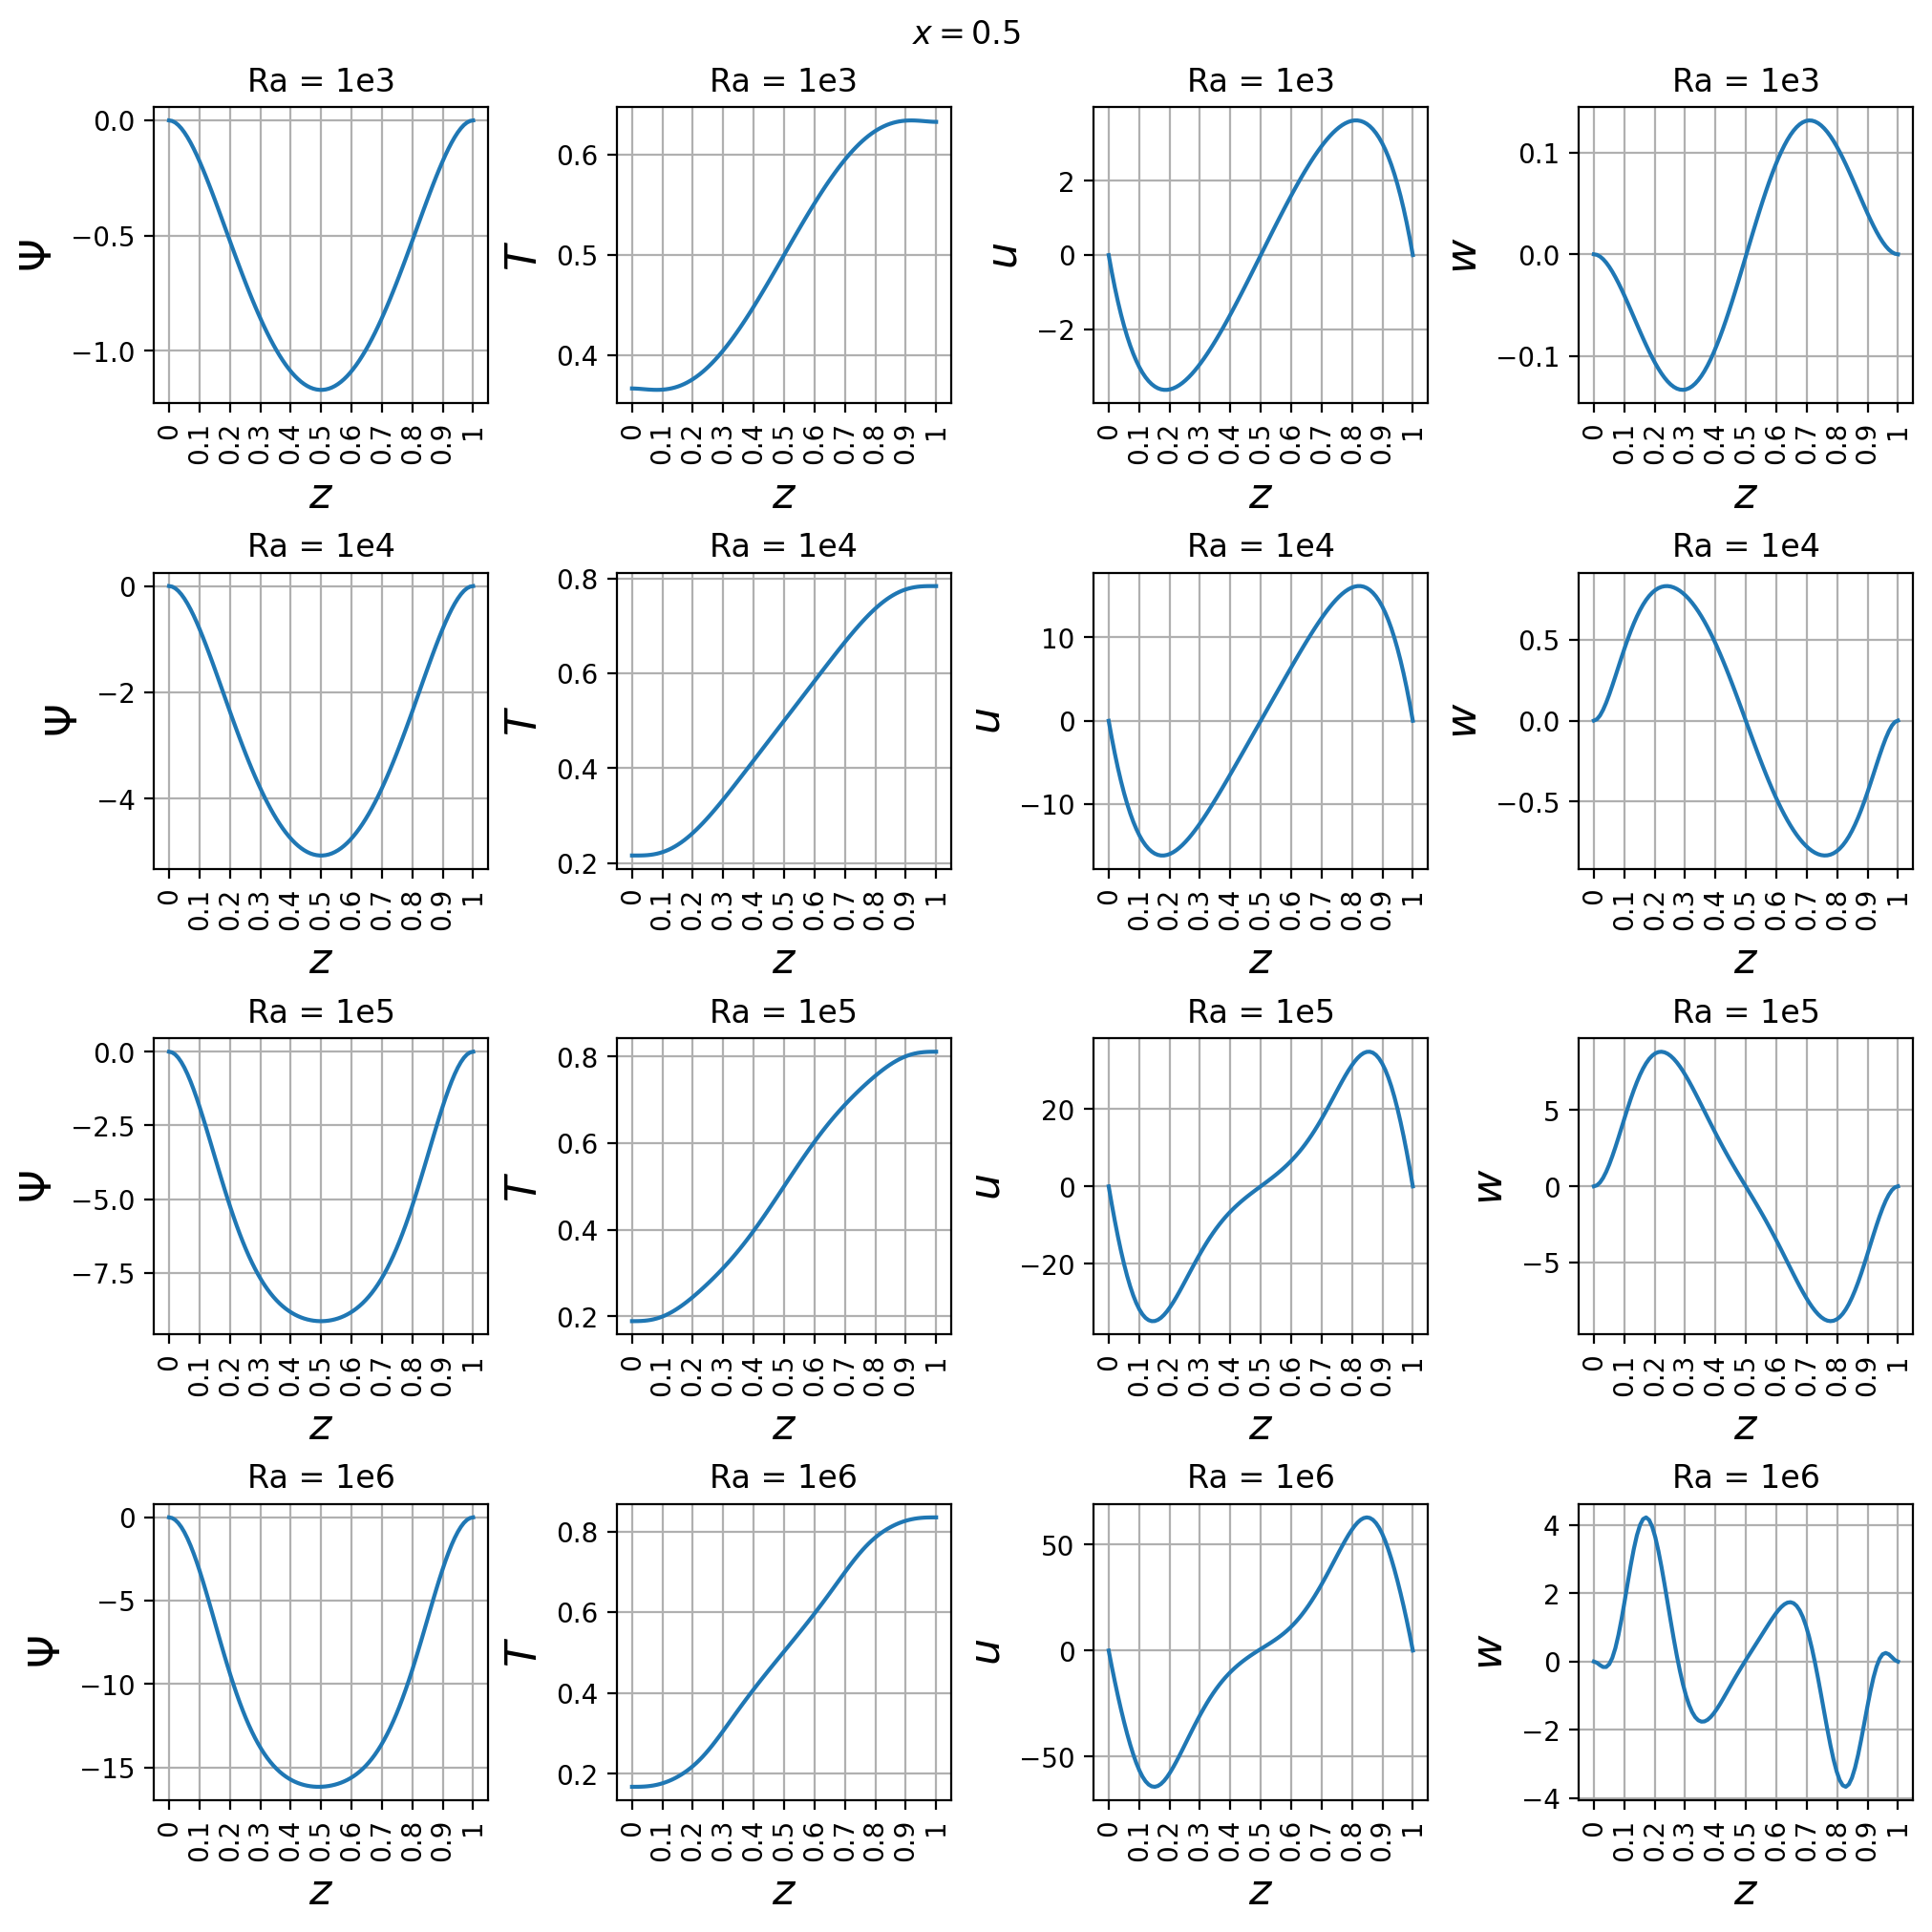

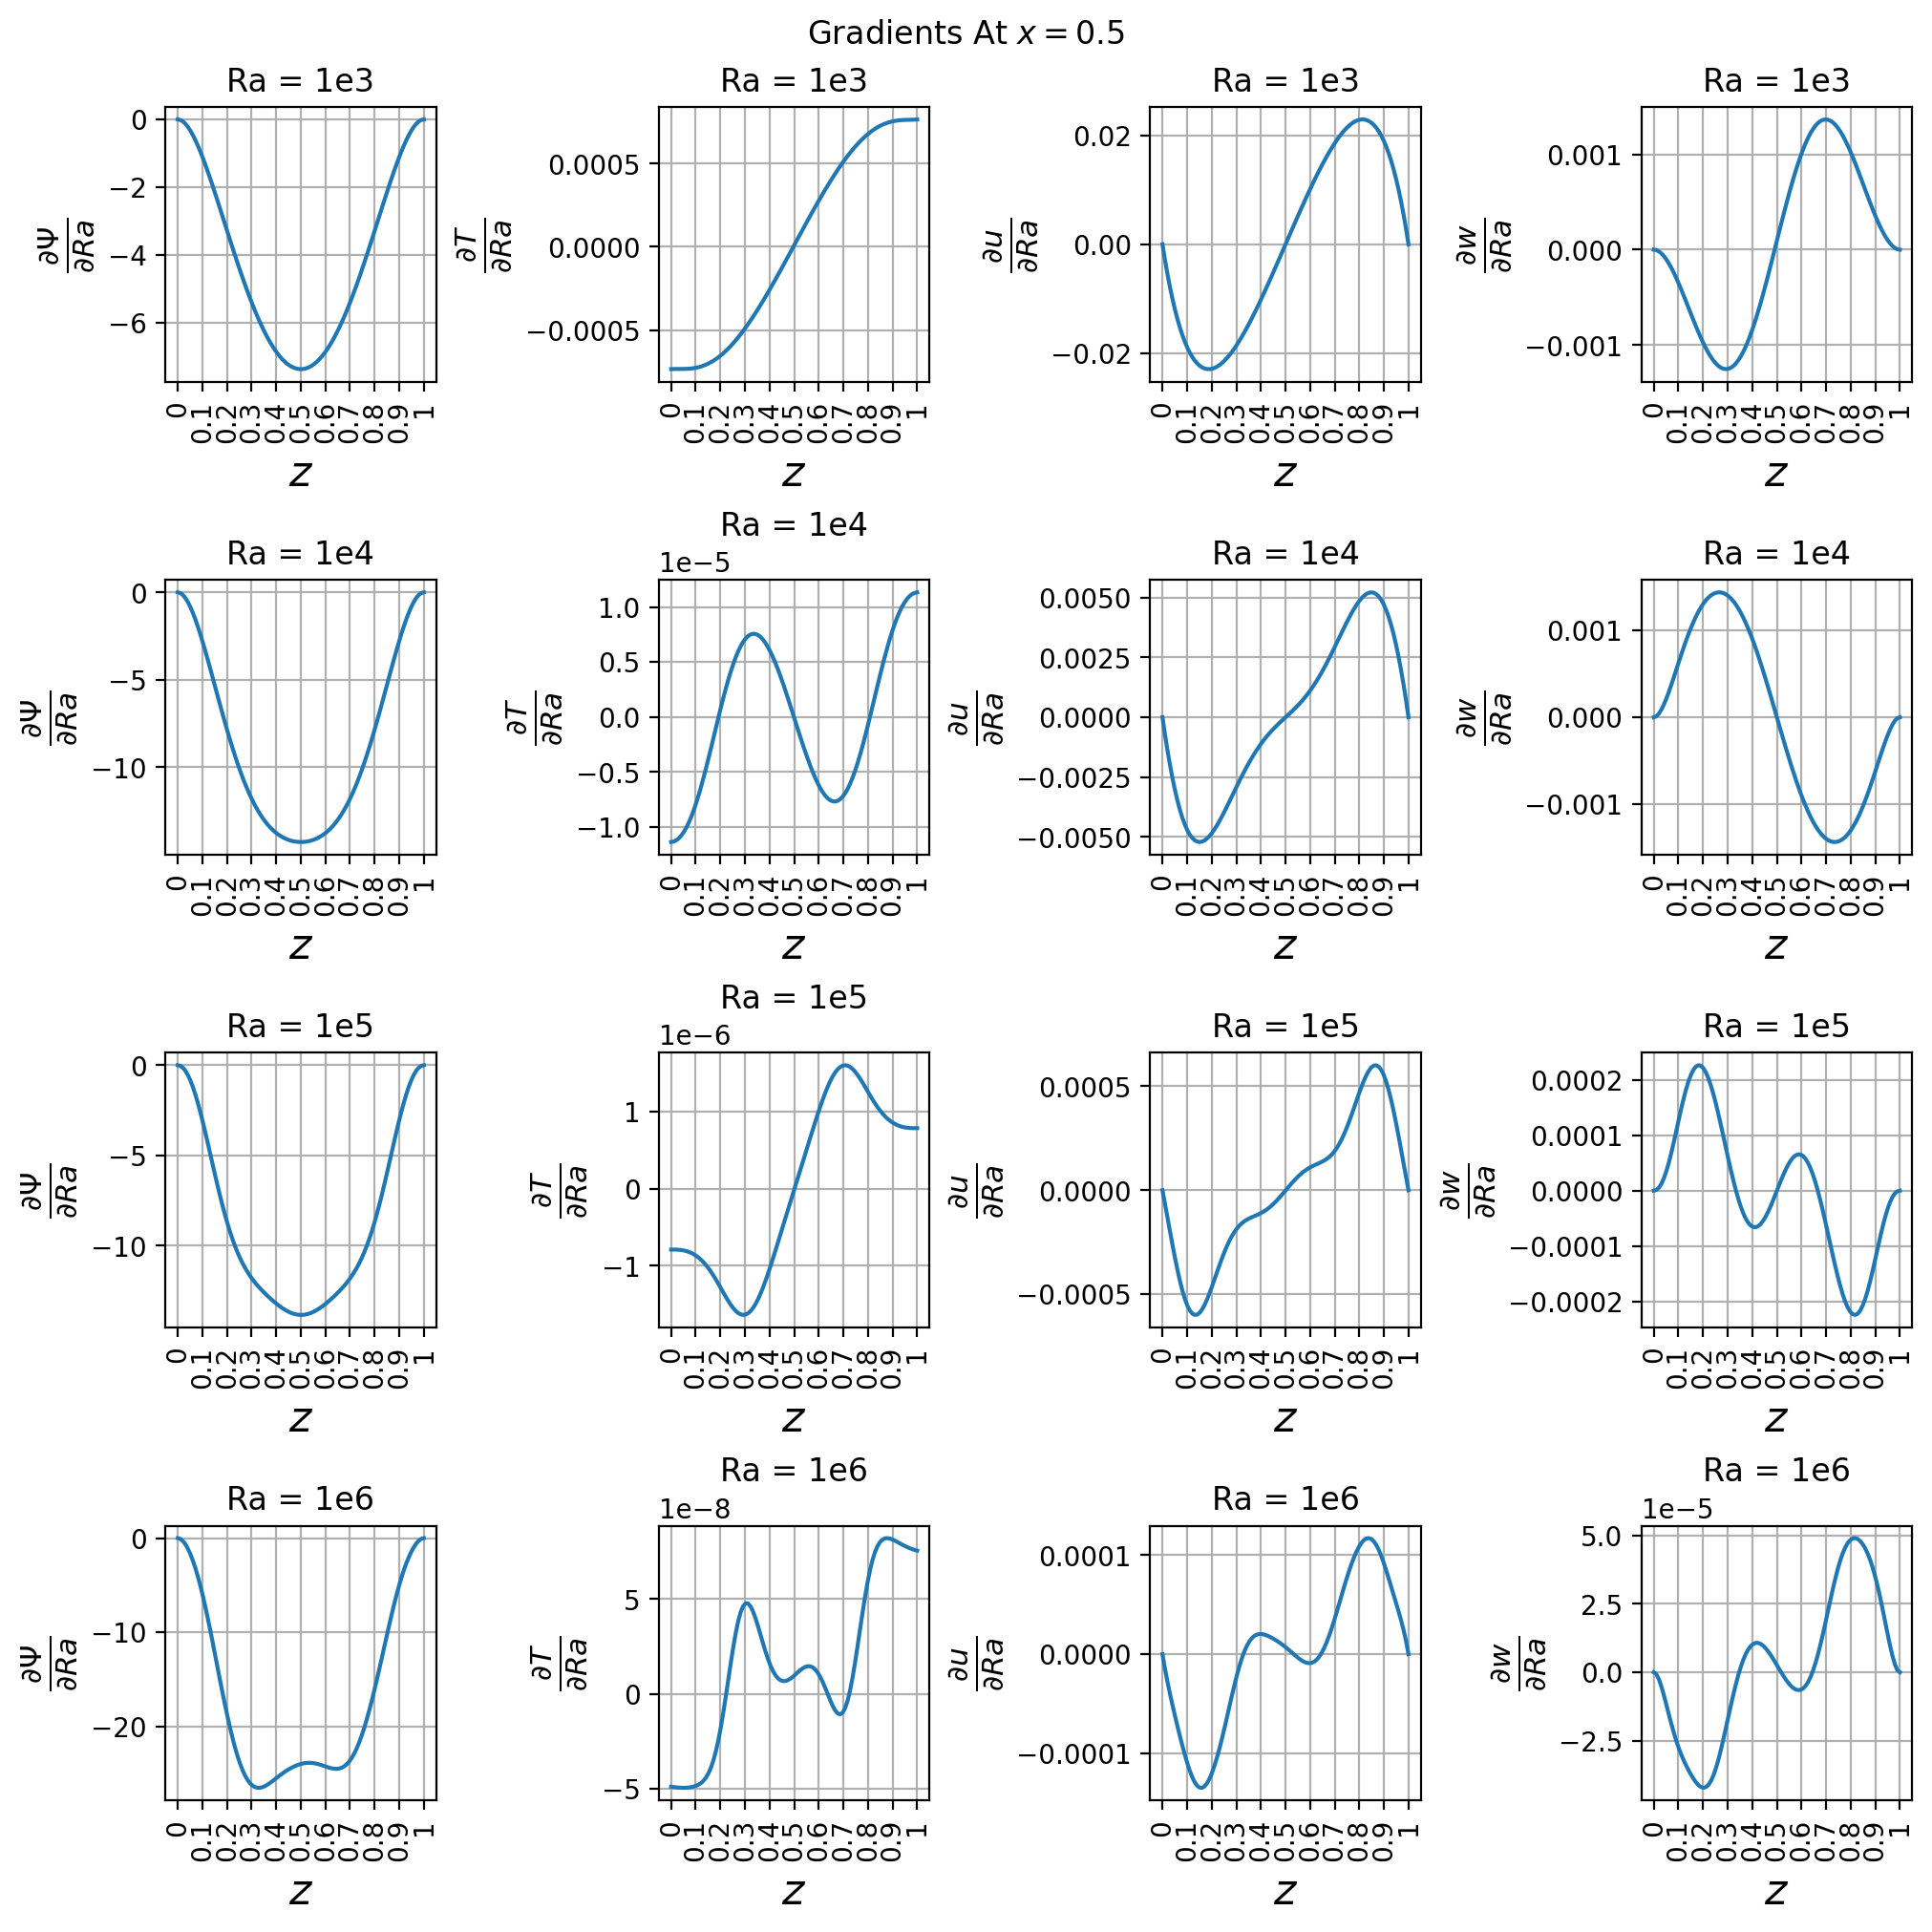

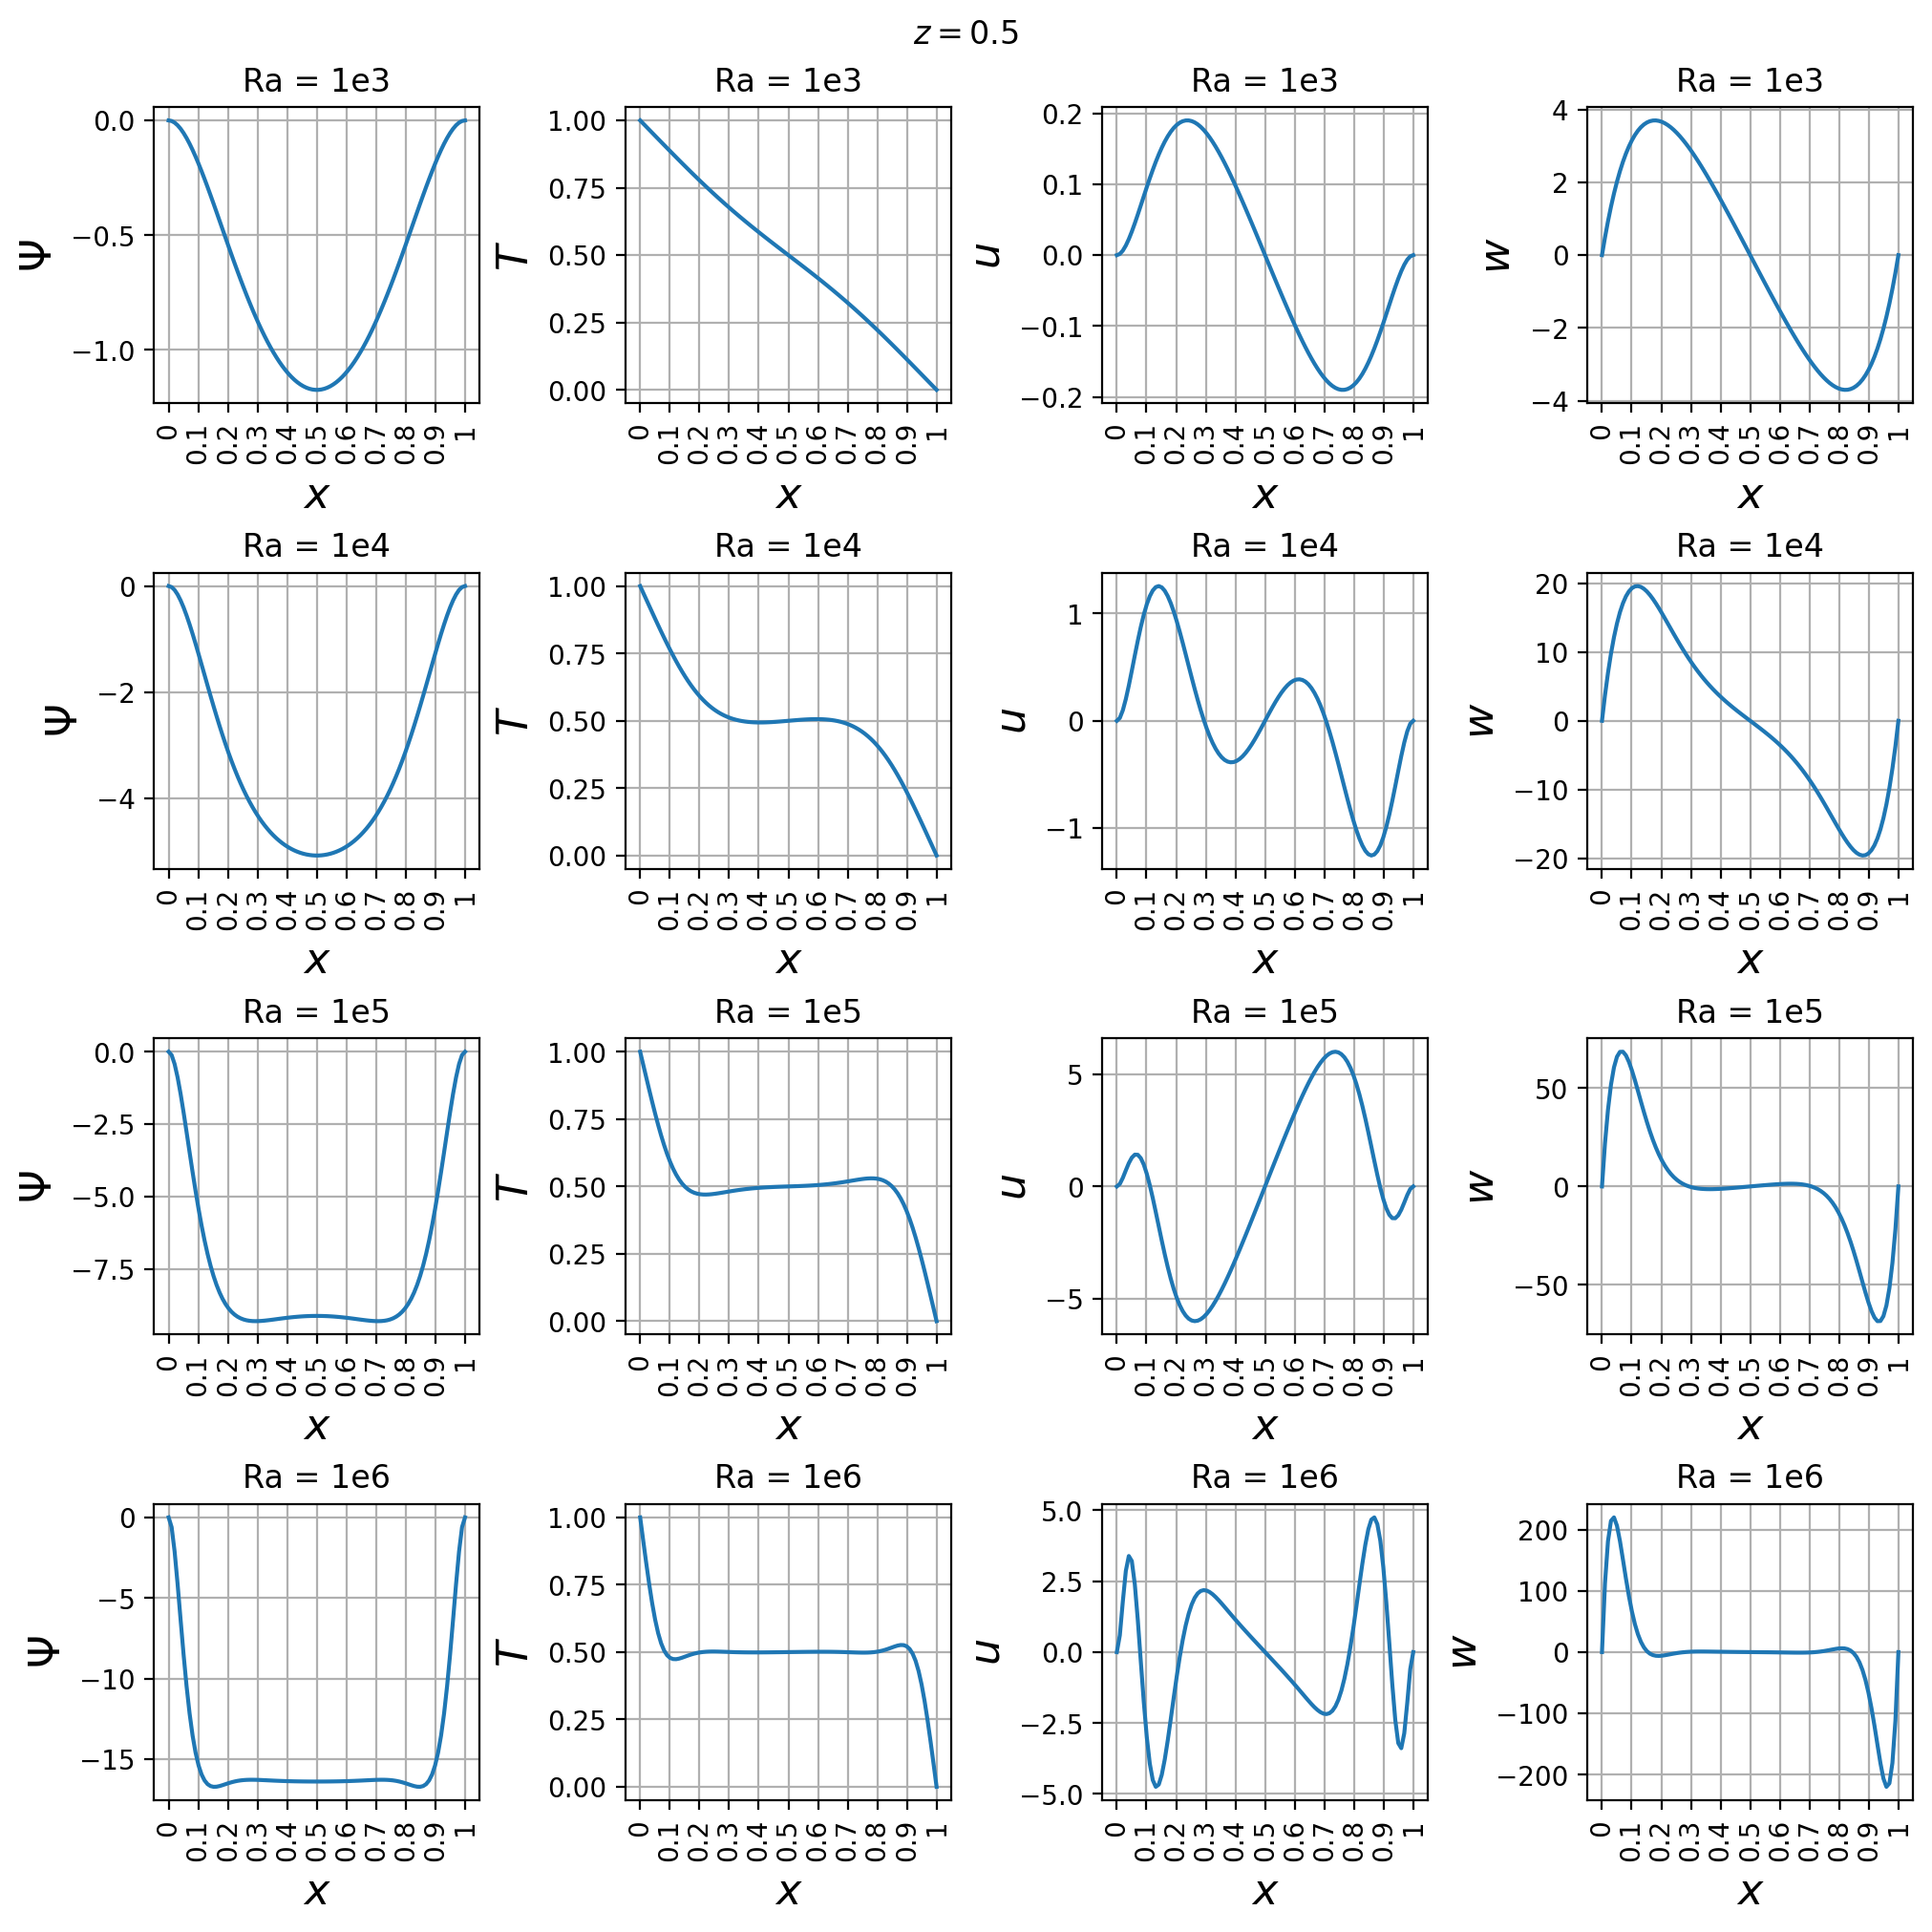

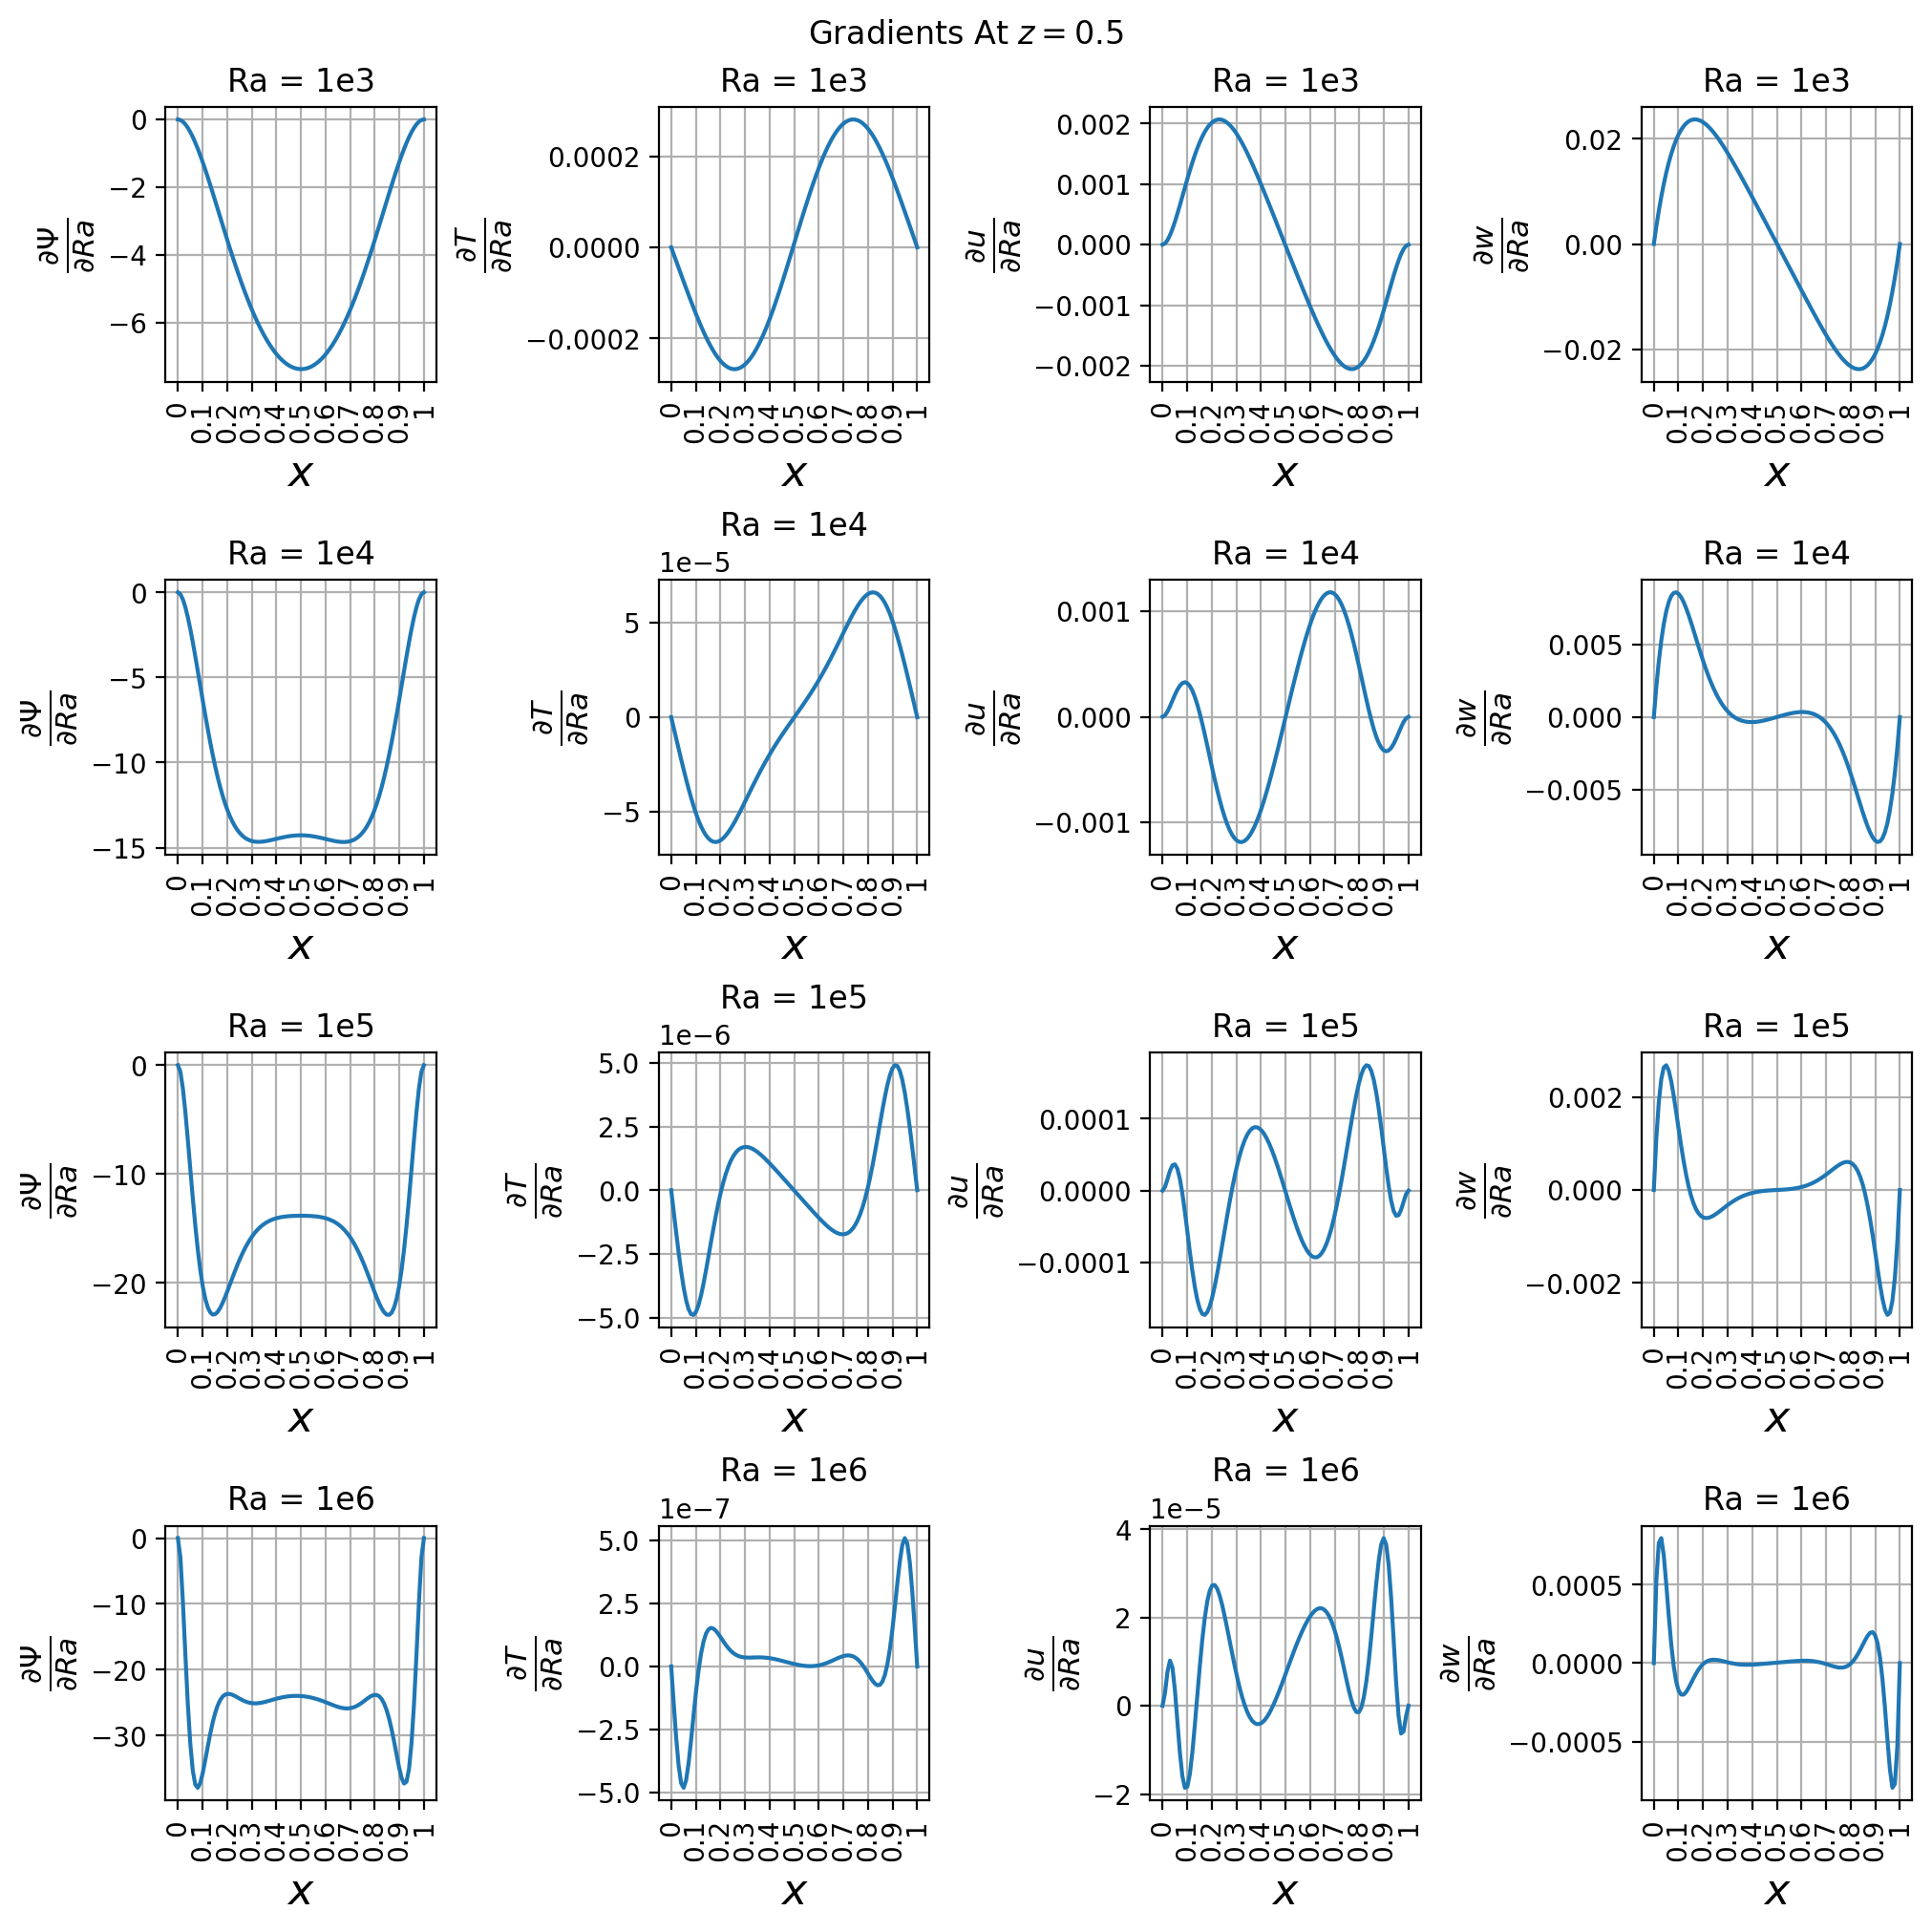

In [5]:
if __name__ == "__main__":

    for ra in plotDict2D:
        path = plotDict2D[ra]
        model = keras.models.load_model(path)
        outputs = pf.output_transform(model,inputs).numpy()
        print(ra,type(ra))
        pf.big_plot(outputs,xx,yy,nx,ra,save_path+"2D_")


    model3D = keras.models.load_model(plot3D)
    for plotWanted in plotsWanted3D:
        ra = plotsWanted3D[plotWanted]
        raInput = (np.log10(ra)-3)/3
        xr,yr,zr = np.meshgrid(x,x,raInput)
        inputsr = np.concatenate((xr.reshape(-1,1),yr.reshape(-1,1),zr.reshape(-1,1)),axis=1)
        outputsr = pf.output_transform3d(model3D,inputsr).numpy()
        pf.big_plot(outputsr,xr[:,:,0],yr[:,:,0],nx,plotWanted,save_path+"3D_")
        pf.plotRaDerivatives(model3D,inputsr,nx,plotWanted,save_path+"3D_")


    pf.xmidPlanePlots(plotDict2D, plotsWanted3D, model3D,save_path)
    pf.zmidPlanePlots(plotDict2D, plotsWanted3D, model3D,save_path)


